In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC   #Support Vector Classifier
from sklearn.model_selection import GridSearchCV    #For hyper-parameter tuning (For Kernel, Gamma & C)
from sklearn.metrics import classification_report   #To get accuracy output
from sklearn.metrics import accuracy_score, confusion_matrix #For model validation
from sklearn.model_selection import train_test_split, cross_val_score #To split data in training & testing set
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_excel("/content/Mushroom.xlsx")
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [45]:
data.drop("Unnamed: 0",axis=True,inplace=True)
data.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [46]:
data.shape

(2000, 25)

In [47]:
data.isnull().sum()

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


In [48]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_edible,class_poisonous
0,14.276173,5.054983,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
1,3.952715,19.068319,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,True,False
2,9.054265,7.205884,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,5.226499,20.932692,True,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
4,14.037532,12.545245,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [49]:
data_dummies.dropna(inplace=False)

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_edible,class_poisonous
0,14.276173,5.054983,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
1,3.952715,19.068319,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,True,False
2,9.054265,7.205884,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,5.226499,20.932692,True,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
4,14.037532,12.545245,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.877891,17.464145,False,False,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,True
1996,6.500840,13.501957,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
1997,13.558064,11.270020,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1998,11.092703,8.423199,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [51]:
x = data_dummies.iloc[:,0:23]
y = data_dummies.iloc[:,23:24]

In [52]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [54]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1400, 23), (600, 23), (1400, 1), (600, 1))

In [55]:
svc = SVC()
gsv = GridSearchCV(svc,{'kernel':['rbf','linear','poly','sigmoid'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001]})
gsv.fit(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                         'gamma': [50, 5, 10, 0.5],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [56]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, np.float64(0.9625))

In [57]:
svc = SVC(C=15, gamma=50)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 96.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[528,   0],
       [ 24,  48]])

In [58]:
y_pred_train = svc.predict(x_train)
acc = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", acc)
confusion_matrix(y_train, y_pred_train)

Accuracy = 100.0


array([[1230,    0],
       [   0,  170]])

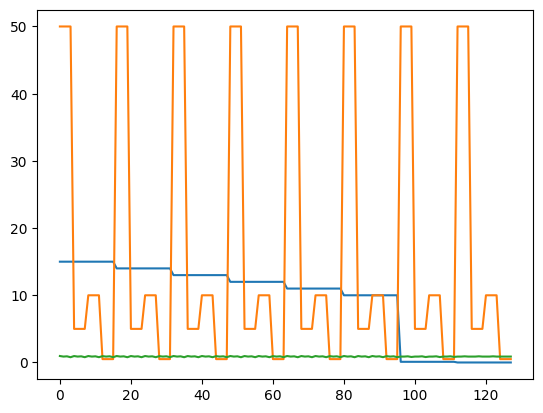

In [59]:
plt.plot(gsv.cv_results_['param_C'])
plt.plot(gsv.cv_results_['param_gamma'])
plt.plot(gsv.cv_results_['mean_test_score'])